# Задание 1

Пусть даны две точки:

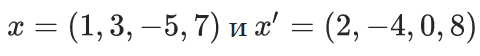

Вычислить евклидово расстояние, манхэттенское расстояние и расстояние Чебышёва между ними.

In [1]:
import numpy as np
x = np.array([1, 3, -5, 7])
x1 = np.array([2, -4, 0, 8])
E_sum = 0
M_sum = 0
CH_sum = []
for i in range(0, len(x)):
    E_sum += (x[i] - x1[i])**2
    M_sum += abs(x[i]-x1[i])
    CH_sum = np.append(CH_sum, abs(x[i]-x1[i]))
print('Евклидово расстояние: ', np.sqrt(E_sum))
print('Манхэттенское расстояние: ', M_sum)
print('Расстояние Чебышёва: ', np.max(CH_sum))

Евклидово расстояние:  8.717797887081348
Манхэттенское расстояние:  14
Расстояние Чебышёва:  7.0


# Задание 2

Приведена таблица некоторых синтетических данных. Вы должны классифицировать новый объект с помощью метода k-ближайший соседей.

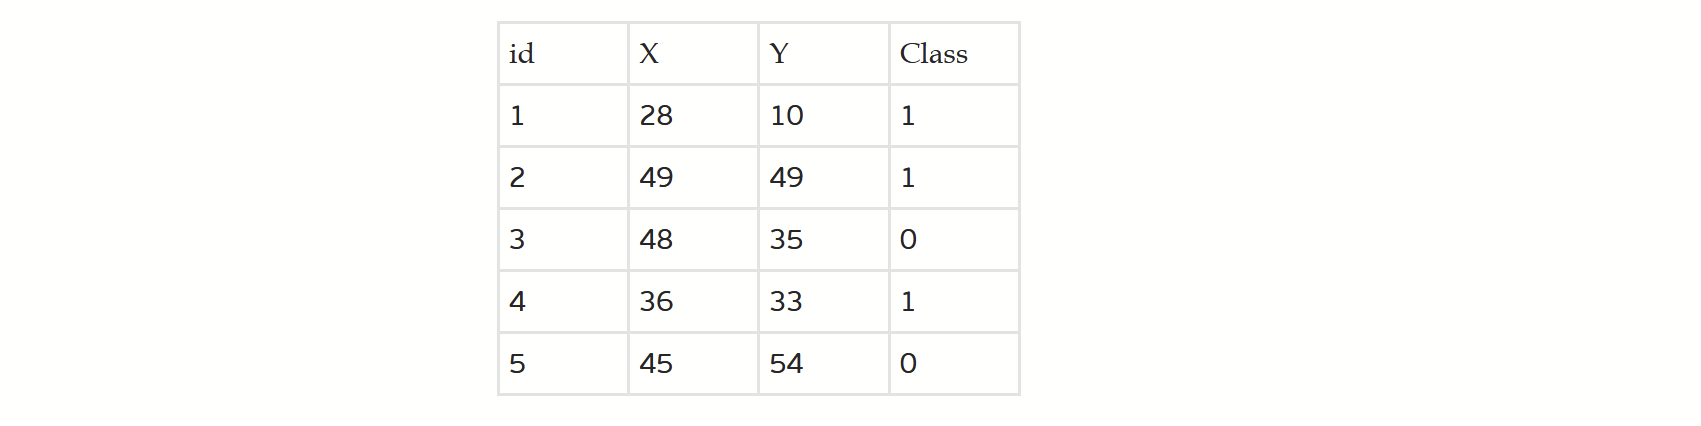

Найдите идентификаторы (id) ближайших соседей для объекта (33,47) используя все 3 метрики.

In [2]:
import pandas as pd

id = np.array(range(1,6))
X = np.array([28, 49, 48, 36, 45])
Y = np.array([10, 49, 35, 33, 54])
Class = np.array([1, 1, 0, 1, 0])

data = pd.DataFrame({'X':X, 'Y':Y, 'Class':Class},
                    columns=['X', 'Y', 'Class'],
                    index=id)
new_obj = np.array([33, 47])
print(data)

    X   Y  Class
1  28  10      1
2  49  49      1
3  48  35      0
4  36  33      1
5  45  54      0


In [3]:
# далее создаем векторы расстояний, которые потом добавим в фрейм
d_E = []
d_M = []
d_CH = []
# далее помещаем в каждый вектор расстояния используя соответствующую метрику
data1 = data
for i in range(1, len(id)+1):
    E_sum = 0
    M_sum = 0
    for j in range(0, 2):
        E_sum += (data1.loc[i].tolist()[j] - new_obj[j]) ** 2
        M_sum += abs(data1.loc[i].tolist()[j] - new_obj[j])
    d_E = np.append(d_E, E_sum)
    d_M = np.append(d_M, M_sum)
    d_CH = np.append(d_CH, max(abs(data1.loc[i].tolist()[0] - new_obj[0]),
                                   abs(data1.loc[i].tolist()[1] - new_obj[1])))
# далее добавляем в датафрейм вычисленные данные

data1['d_E'] = d_E
data1['d_M'] = d_M
data1['d_CH'] = d_CH
# далее выводим фреймы отсортрованные по заданной метрике
metric = ['d_E', 'd_M', 'd_CH']
for i in range(0, len(metric)):
    print('---------- use metric ', metric[i], '----------')
    print(data1.sort_values(metric[i]))

---------- use metric  d_E ----------
    X   Y  Class     d_E   d_M  d_CH
5  45  54      0   193.0  19.0  12.0
4  36  33      1   205.0  17.0  14.0
2  49  49      1   260.0  18.0  16.0
3  48  35      0   369.0  27.0  15.0
1  28  10      1  1394.0  42.0  37.0
---------- use metric  d_M ----------
    X   Y  Class     d_E   d_M  d_CH
4  36  33      1   205.0  17.0  14.0
2  49  49      1   260.0  18.0  16.0
5  45  54      0   193.0  19.0  12.0
3  48  35      0   369.0  27.0  15.0
1  28  10      1  1394.0  42.0  37.0
---------- use metric  d_CH ----------
    X   Y  Class     d_E   d_M  d_CH
5  45  54      0   193.0  19.0  12.0
4  36  33      1   205.0  17.0  14.0
3  48  35      0   369.0  27.0  15.0
2  49  49      1   260.0  18.0  16.0
1  28  10      1  1394.0  42.0  37.0


Посмотрев на первые строки каждого фрейма, получаем ответ: 5 (E), 4(M), 5(CH).

# Задание 3

Приведена таблица некоторых синтетических данных. Вы должны классифицировать новый объект с помощью взвешенного метода k-ближайшего соседа.

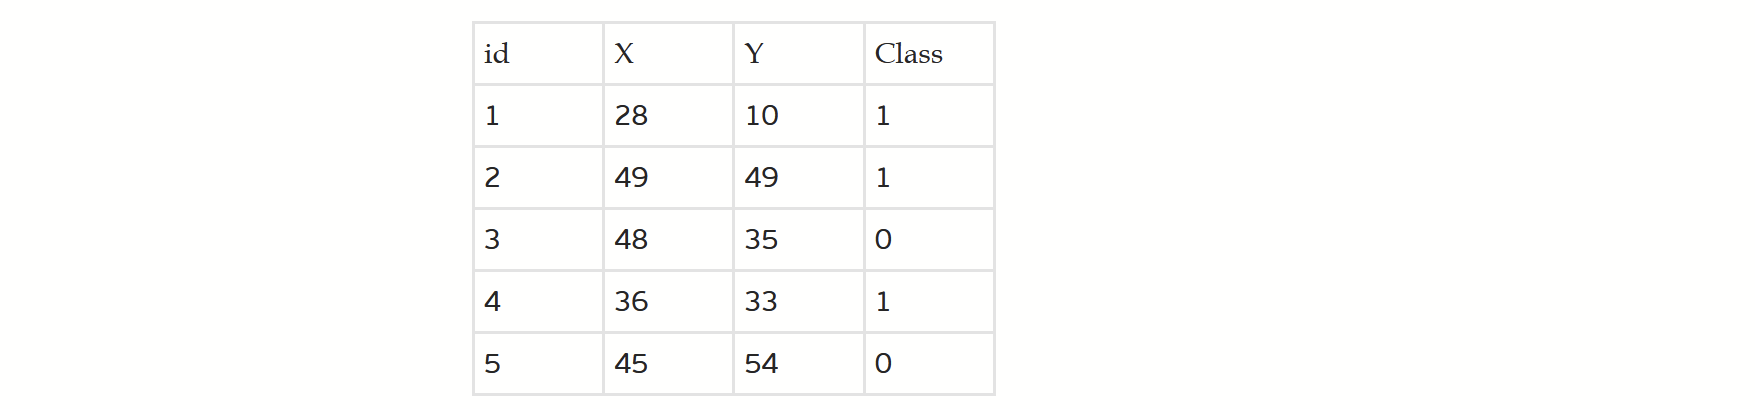

Веса $ω_i$ обратно пропорциональны квадрату расстояния между объектами. Используйте евклидову метрику. Новый объект — (33,47).

Найти:
- Взвешенную сумму класса 0 среди 5 ближайших соседей.
- Взвешенную сумму класса 1 среди 5 ближайших соседей.

In [4]:
weights_E = 1/d_E
data2 = data
data2['weights_E'] = weights_E
print('Взвешеная сумма класса 1', sum(data2[data2.Class == 1].weights_E))
print('Взвешеная сумма класса 0', sum(data2[data2.Class == 0].weights_E))

Взвешеная сумма класса 1 0.00944156274141927
Взвешеная сумма класса 0 0.00789137425053007


# Задание 4

Вам доступна таблица некоторых синтетических данных, на основании которых необходимо выполнить классификацию нового объекта, с помощью метода k-ближайших соседей.

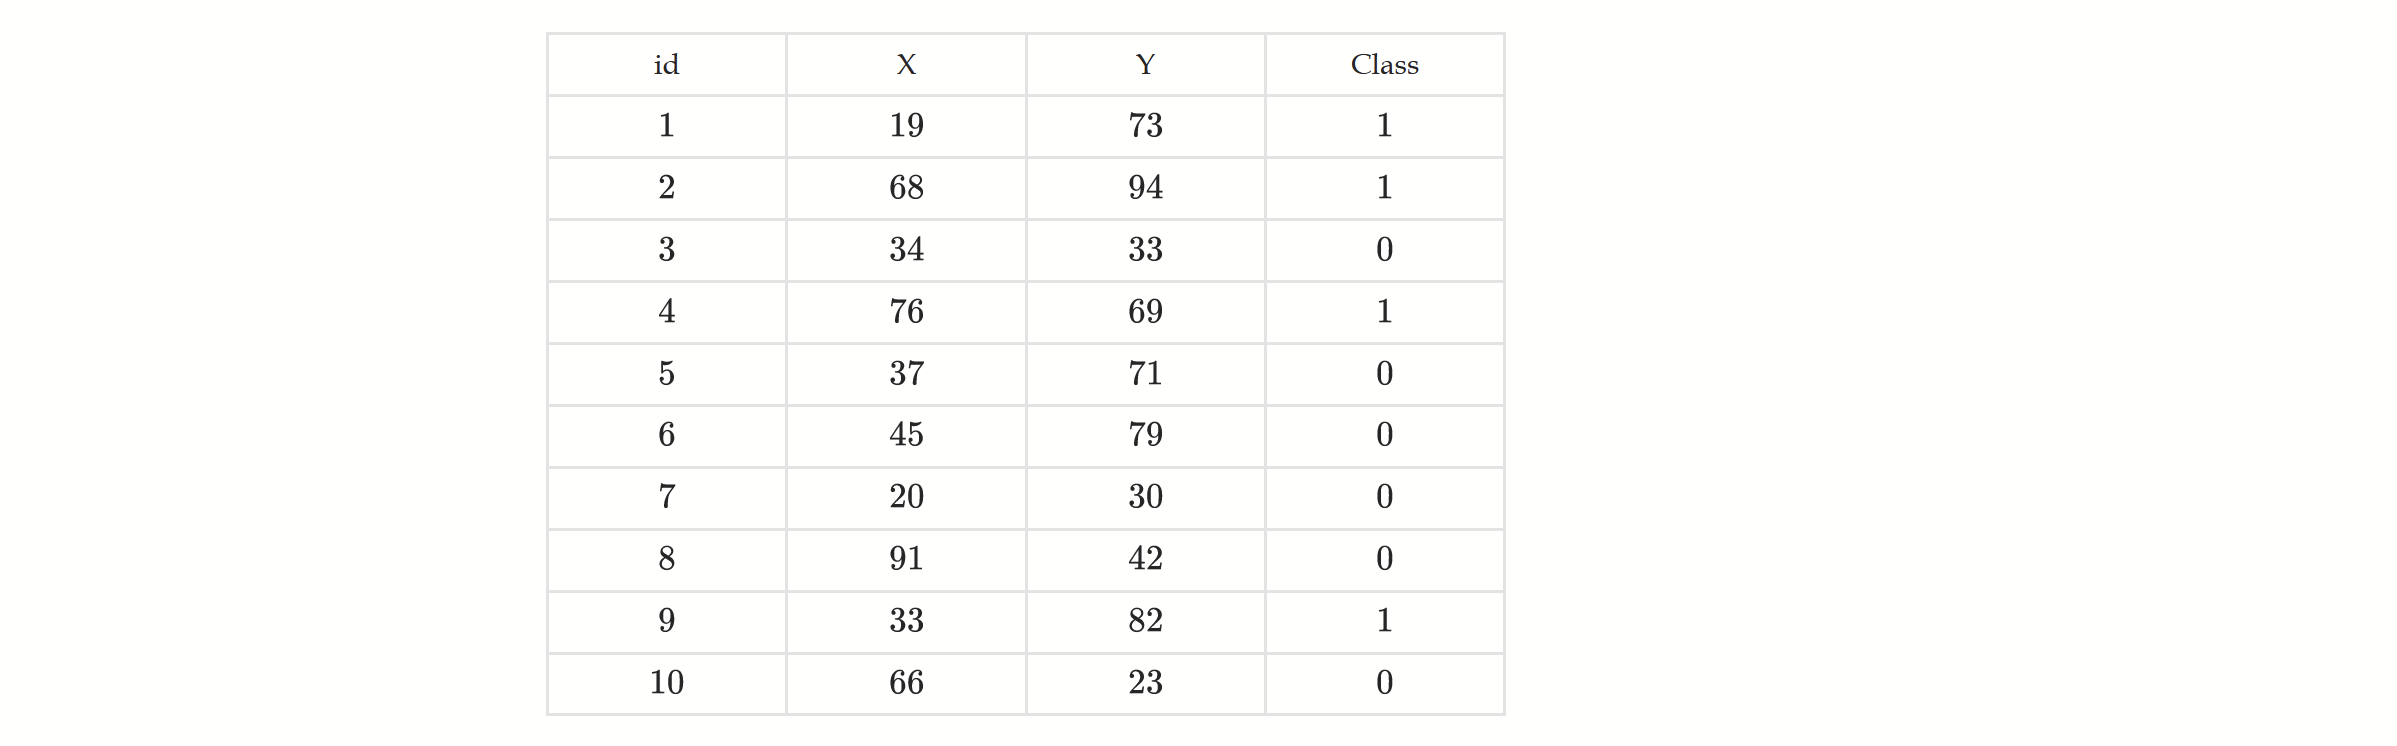

Найти:
- Расстояние от нового объекта с координатами (99,49) до ближайшего соседа, используя евклидову метрику
- Идентификатры трех ближайших точек к (99,49) для евклидовой метрики
- Класс для нового объекта с координатами (99,49) при k=3 и евклидовой метрике
- Расстояние от нового объекта с координатами (99,49) до ближайшего соседа, используя метрику городских кварталов (Манхеттенское расстояние)
- Идентификатры трех ближайших точек к (99,49) для метрики городских кварталов
- Класс для нового объекта с координатами (99,49) при k=3 и метрике городских кварталов

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/mihneh/ITMO_ML_labs/main/lab_kNN/task_5_1.csv', index_col='id')
data.head()

,X,Y,Class
id,,,
1,19,73,1
2,68,94,1
3,34,33,0
4,76,69,1
5,37,71,0


Метрика городских кварталов:

In [16]:
new_obj = np.array([99, 49]).reshape(-1, 1)
neigh = KNeighborsClassifier(n_neighbors=3, p=1)
neigh.fit(np.array(data.iloc[:, 0:2]), np.array(data.Class))
n_M = neigh.kneighbors(new_obj.reshape(1,-1))

print('Ближайщие соседи к [99, 49] с индексами (если нумерация от 0): ',n_M[1])
print('Расстояния от [99, 49] до ближайшего соседа: ', n_M[0][0][0])
print('Класс для нового объекта: ', neigh.predict(new_obj.reshape(1,-1)))

Ближайщие соседи к [99, 49] с индексами (если нумерация от 0):  [[7 3 9]]
Расстояния от [99, 49] до ближайшего соседа:  15.0
Класс для нового объекта [0]


Евклидова метрика:

In [17]:
new_obj = np.array([99, 49]).reshape(-1, 1)
neigh = KNeighborsClassifier(n_neighbors=3, p=2)
neigh.fit(np.array(data.iloc[:, 0:2]), np.array(data.Class))
n_M = neigh.kneighbors(new_obj.reshape(1,-1))

print('Ближайщие соседи к [99, 49] с индексами (если нумерация от 0): ',n_M[1])
print('Расстояния от [99, 49] до ближайшего соседа: ', n_M[0][0][0])
print('Класс для нового объекта: ', neigh.predict(new_obj.reshape(1,-1)))

Ближайщие соседи к [99, 49] с индексами (если нумерация от 0):  [[7 3 9]]
Расстояния от [99, 49] до ближайшего соседа:  10.63014581273465
Класс для нового объекта:  [0]
